In [1]:
import numpy as np
import pandas as pd
import os
import re
import csv

In [2]:
def func(path, data):
    for file in os.listdir(path):
        try:
            with open(path+file, 'r') as f:
                email_contents = f.read()
            from_match = re.search(r"^From: (.+)$", email_contents, flags=re.MULTILINE)
            subject_match = re.search(r"^Subject: (.+)$", email_contents, flags=re.MULTILINE)
            pattern = r'^$(.*)'
            match = re.search(pattern, email_contents, re.DOTALL | re.MULTILINE)

            if not from_match:
                continue
            if not subject_match:
                continue

            content = ""
            if match:
                content = match.group(1)
            if 'spam' in path:
                data.append([from_match.group(1), subject_match.group(1), content, '0'])
            else:
                data.append([from_match.group(1), subject_match.group(1), content, '1'])
        except UnicodeDecodeError:
            pass

In [3]:
spam = './dataset/spam/'
spam_2 = './dataset/spam_2/'
data = [['From', 'Subject', 'Content', 'Result']]
func(spam, data)
func(spam_2, data)
easy_ham = './dataset/easy_ham/'
easy_ham_2 = './dataset/easy_ham_2/'
hard_ham = './dataset/hard_ham/'
func(easy_ham, data)
func(easy_ham_2, data)
func(hard_ham, data)
print(len(data))

10701


In [4]:
df = pd.DataFrame(data[1:], columns=['From', 'Subject', 'Content', 'Result'])

In [5]:
df.sample(frac=1)

,From,Subject,Content,Result
3402,"""Goldie Cohan"" <bvkgkbvksdjhf@msn.com>",Fw: The money saving plan we spoke of ...,\n<HTML><HEAD><META http-equiv=3DContent-Type ...,0
4586,"""R. A. Hettinga"" <rah@shipwright.com>",Re: Pluck and Luck,"\nAt 5:29 PM -0700 on 9/23/02, John Hall wrote...",1
8311,guardian <rssfeeds@example.com>,A Non-Integer Power Function on the Pixel Shader,"\nURL: http://www.newsisfree.com/click/-4,6436...",1
1662,"""Wild Cats"" <extensor@paris.com>",Call me 93910,\n\nHello I am your hot lil horny toy.\n I ...,0
3648,<fhogan@bigfoot.com>,"The Government Grants you $25,000!",\n<html>\n<head>\n</head>\n<center>\n<h1>\n<b>...,0
...,...,...,...,...
6803,"""Gordon Mohr"" <gojomo@usa.net>",Re: Selling Wedded Bliss (was Re: Ouch...),\nDefinitional nit to pick:\n\nRobert Harley w...,1
6613,"""John Hall"" <johnhall@evergo.net>",My source: RE: A biblical digression,\nRemember I didn't say it was necessarily a g...,1
9995,Daniel Demus <daniel@demus.dk>,Re: Quick php advice needed :-),"\nOn Thu, 2002-08-01 at 10:51, Matthias Saou w...",1
9402,"""Will Glynn"" <delta407@delta407.homeip.net>",Re: [Razor-users] What's wrong with the Razor ...,\n> Who loses in this case? Why? Neither party...,1


In [6]:
df_final = df

In [7]:
df_final.tail()

,From,Subject,Content,Result
10695,"""Geocaching Notify Bot"" <notify@geocaching.com>",Geocaching.com Weekly Cache Notification,\nGreetings from Geocaching.com -\n\n\nRecent ...,1
10696,"""Laurie Warren"" <laurie@primal.ucdavis.edu>",Securing multiple virtual hosts,\nI am trying to secure three of four virtual ...,1
10697,O'Reilly.&.Associates@dogma.slashnull.org,JavaServer Pages updated,"\nFilled with useful examples and the depth, c...",1
10698,Digestifier <Linux-Announce-Request@senator-be...,Linux-Announce Digest #180,"\nLinux-Announce Digest #180, Volume #4 ...",1
10699,mailman-owner@lists.sourceforge.net,(SPAM? 08.00) lists.sourceforge.net mailing li...,\n********************************************...,1


In [8]:
df_final['Subject']

0                           Life Insurance - Why Pay More?
1        [ILUG] Guaranteed to lose 10-12 lbs in 30 days...
2        Guaranteed to lose 10-12 lbs in 30 days       ...
3        Re: Fw: User Name & Password to Membership To ...
4        [ILUG-Social] re: Guaranteed to lose 10-12 lbs...
                               ...                        
10695             Geocaching.com Weekly Cache Notification
10696                      Securing multiple virtual hosts
10697                             JavaServer Pages updated
10698                           Linux-Announce Digest #180
10699    (SPAM? 08.00) lists.sourceforge.net mailing li...
Name: Subject, Length: 10700, dtype: object

In [9]:
df_target=df_final.Result
df_target=df_target.astype(int)
df_target.head()

0    0
1    0
2    0
3    0
4    0
Name: Result, dtype: int32

In [10]:
df_final['From']= df_final['From'].astype(str)
df_final['Subject']= df_final['Subject'].astype(str)
df_final['Content']= df_final['Content'].astype(str)
df_final.head()

,From,Subject,Content,Result
0,12a1mailbot1@web.de,Life Insurance - Why Pay More?,"\n<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 ...",0
1,"""Slim Down"" <taylor@s3.serveimage.com>",[ILUG] Guaranteed to lose 10-12 lbs in 30 days...,\n1) Fight The Risk of Cancer!\nhttp://www.adc...,0
2,"""Slim Down"" <sabrina@mx3.1premio.com>",Guaranteed to lose 10-12 lbs in 30 days ...,\n1) Fight The Risk of Cancer!\nhttp://www.adc...,0
3,Account Services <wsup@playful.com>,Re: Fw: User Name & Password to Membership To ...,\n############################################...,0
4,"""Slim n Trim"" <yenene@mx2.1premio.com>",[ILUG-Social] re: Guaranteed to lose 10-12 lbs...,\nI thought you might like these:\n1) Slim Dow...,0


In [11]:
df_target.value_counts()

1    6944
0    3756
Name: Result, dtype: int64

# Visualization

In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tsaur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<AxesSubplot:xlabel='Result', ylabel='count'>

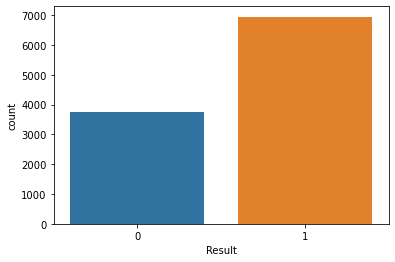

In [13]:
sns.countplot(x = df_target)

Text(0.5, 1.0, 'Spam Word Cloud')

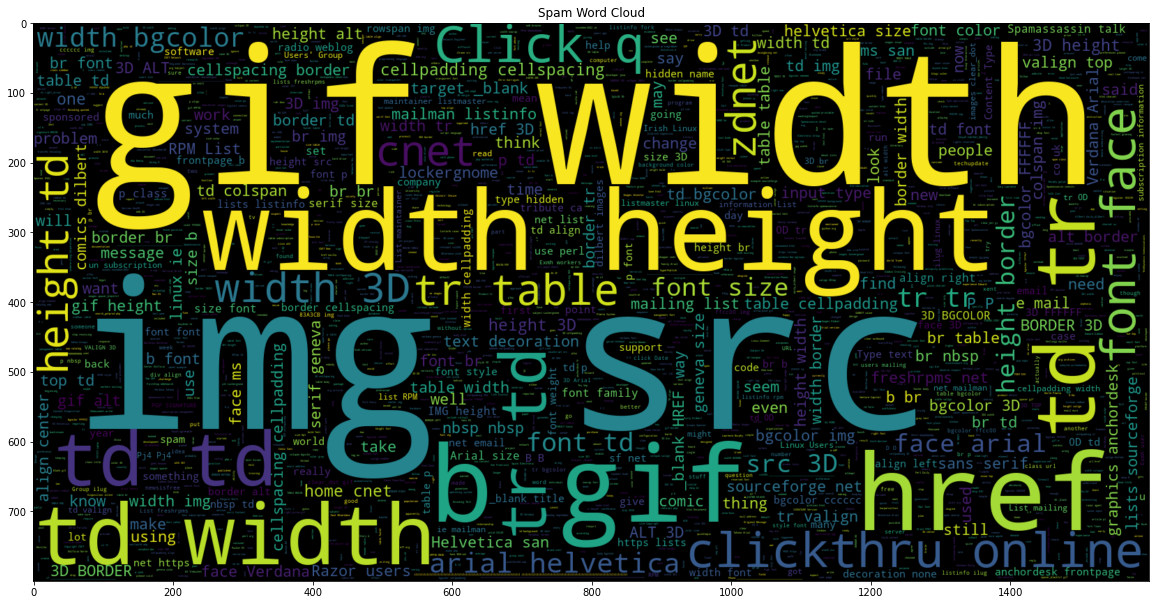

In [14]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df_final[df_final.Result == "1"].Content))
plt.imshow(wc , interpolation = 'bilinear')
plt.title("Spam Word Cloud")

Text(0.5, 1.0, 'Ham Word Cloud')

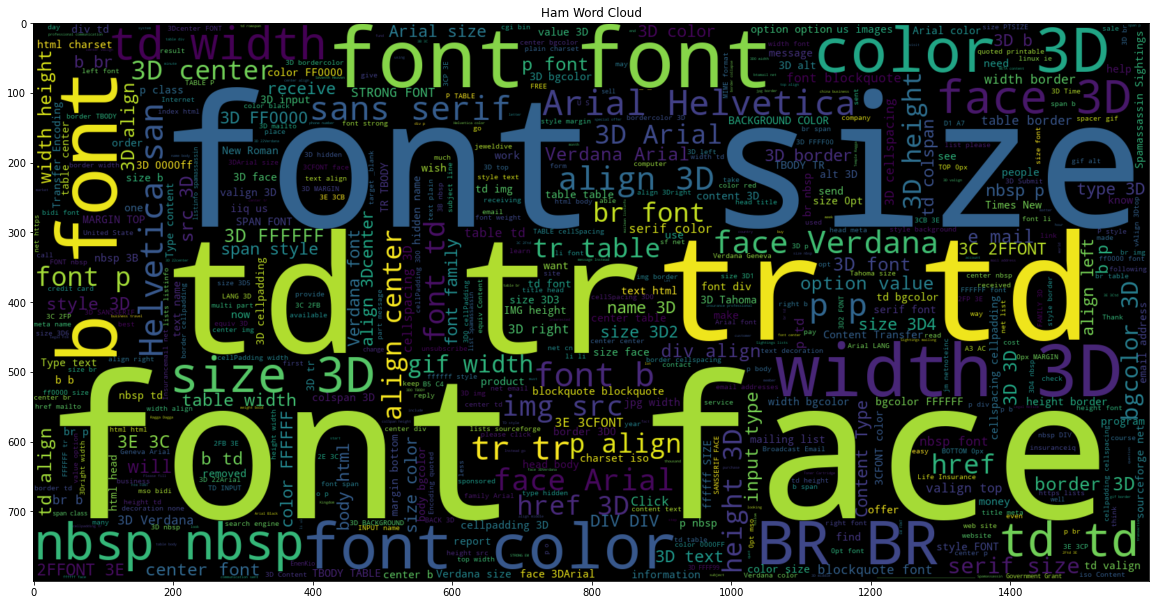

In [15]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df_final[df_final.Result == "0"].Content))
plt.imshow(wc , interpolation = 'bilinear')
plt.title("Ham Word Cloud")

# Stemming and Tokenizer

In [16]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S+|[^A-Za-z0-9]:\S+|subject:\S+|nbsp"

In [17]:
def preprocess(text, stem=False):
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

df_final.Content = df_final.Content.apply(lambda x: preprocess(x))
df_final.head()

,From,Subject,Content,Result
0,12a1mailbot1@web.de,Life Insurance - Why Pay More?,"<!doctype html public ""-//w3c//dtd html 4.0 tr...",0
1,"""Slim Down"" <taylor@s3.serveimage.com>",[ILUG] Guaranteed to lose 10-12 lbs in 30 days...,1) fight risk cancer! 2) slim - guaranteed los...,0
2,"""Slim Down"" <sabrina@mx3.1premio.com>",Guaranteed to lose 10-12 lbs in 30 days ...,1) fight risk cancer! 2) slim - guaranteed los...,0
3,Account Services <wsup@playful.com>,Re: Fw: User Name & Password to Membership To ...,##############################################...,0
4,"""Slim n Trim"" <yenene@mx2.1premio.com>",[ILUG-Social] re: Guaranteed to lose 10-12 lbs...,thought might like these: 1) slim - guaranteed...,0


In [18]:
x = df_final['Content']
y = df_final['Result']

In [19]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(y)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                         random_state=7)
print("Train Data size:", len(x_train))
print("Test Data size", len(x_test))

Train Data size: 8560
Test Data size 2140


In [21]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1000
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 107584


In [22]:
from keras_preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(x_train),
                        maxlen = 50)
x_test = pad_sequences(tokenizer.texts_to_sequences(x_test),
                       maxlen = 50)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (8560, 50)
Testing X Shape: (2140, 50)


In [23]:
x_train

array([[  346,   570,    60, ...,  1592,   120, 41132],
       [ 7950,  1577,  9546, ...,   139,  5640,  4614],
       [    0,     0,     0, ..., 41133,     9,     9],
       ...,
       [    0,     0,     0, ...,   231,  1171,   572],
       [ 1218,   676,    51, ...,    41,   607,   621],
       [  190,   243,   177, ...,    41,   243,   177]])

# ANN

In [24]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
ann = Sequential()
ann.add(Dense(16, activation='relu', input_dim=50))
# Adding dropout to prevent overfitting
ann.add(Dropout(0.1))
ann.add(Dense(1, activation='sigmoid'))

In [26]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                816       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


In [232]:
# loss_fn = tf.keras.losses.BinaryCrossentropy(
#             from_logits=False,
#             label_smoothing=0.0,
#             axis=-1,
#             reduction=losses_utils.ReductionV2.AUTO,
#             name='binary_crossentropy'
#         )

In [27]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
history = ann.fit(x_train, y_train,
                  batch_size=10,
                  epochs=30,
                  verbose=2,
                  validation_data=(x_test, y_test))

Epoch 1/30
856/856 - 2s - loss: 0.6103 - accuracy: 0.6728 - val_loss: 0.8660 - val_accuracy: 0.6636 - 2s/epoch - 3ms/step
Epoch 2/30
856/856 - 2s - loss: 0.6109 - accuracy: 0.6727 - val_loss: 0.8679 - val_accuracy: 0.6636 - 2s/epoch - 3ms/step
Epoch 3/30
856/856 - 1s - loss: 0.6096 - accuracy: 0.6727 - val_loss: 0.8675 - val_accuracy: 0.6636 - 1s/epoch - 2ms/step
Epoch 4/30
856/856 - 2s - loss: 0.6089 - accuracy: 0.6725 - val_loss: 0.8699 - val_accuracy: 0.6636 - 2s/epoch - 3ms/step
Epoch 5/30
856/856 - 2s - loss: 0.6125 - accuracy: 0.6729 - val_loss: 0.8727 - val_accuracy: 0.6636 - 2s/epoch - 3ms/step
Epoch 6/30
856/856 - 3s - loss: 0.6434 - accuracy: 0.6710 - val_loss: 0.8206 - val_accuracy: 0.6645 - 3s/epoch - 3ms/step
Epoch 7/30
856/856 - 3s - loss: 0.6096 - accuracy: 0.6721 - val_loss: 0.8601 - val_accuracy: 0.6650 - 3s/epoch - 3ms/step
Epoch 8/30
856/856 - 2s - loss: 0.6130 - accuracy: 0.6731 - val_loss: 0.8273 - val_accuracy: 0.6650 - 2s/epoch - 2ms/step
Epoch 9/30
856/856 - 2s 

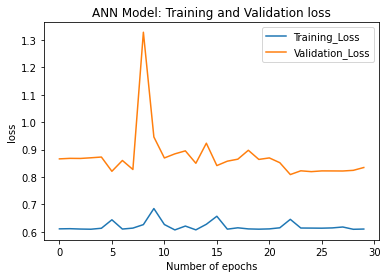

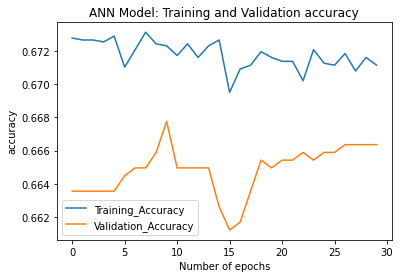

In [31]:
metrics = pd.DataFrame(history.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('ANN Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])
# Plot
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [32]:
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)

67/67 [==============================] - 0s 1ms/step


In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[  47,  711],
       [   3, 1379]], dtype=int64)

In [34]:
print("Our accuracy is %{}".format(((cm[0][0] + cm[1][1])/len(x_test))*100))

Our accuracy is %66.6355140186916


# RNN

In [35]:
from keras.layers import SimpleRNN
rnn = Sequential()
rnn.add(SimpleRNN(128, activation='relu', input_dim=50 , return_sequences = True))
rnn.add(SimpleRNN(64, activation='relu' ,  return_sequences = False))
# Adding dropout to prevent overfitting
#rnn.add(Dropout(0.1))
rnn.add(Dense(1, activation='sigmoid'))

In [36]:
rnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, None, 128)         22912     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                12352     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 35,329
Trainable params: 35,329
Non-trainable params: 0
_________________________________________________________________


In [37]:
rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [38]:
print(x_train.shape)
print(y_train.shape)

(8560, 50)
(8560,)


In [39]:
print(x_test.shape)
print(y_test.shape)

(2140, 50)
(2140,)


In [40]:
x_train1 = x_train.reshape(8560,1,50)
y_train1 = np.array(y_train).reshape(8560,1,1)

In [41]:
x_test1 = x_test.reshape(2140,1,50)
y_test1 = np.array(y_test).reshape(2140,1,1)

In [42]:
early_stop = EarlyStopping(monitor = 'val_loss', patience=60)

history = rnn.fit(x_train1, y_train1,
                  batch_size=100,
                  epochs=100,
                  verbose=2,
                  callbacks=[early_stop],
                  validation_data=(x_test1, y_test1))

Epoch 1/100
86/86 - 3s - loss: 570.1811 - accuracy: 0.6416 - val_loss: 265.2126 - val_accuracy: 0.6907 - 3s/epoch - 33ms/step
Epoch 2/100
86/86 - 0s - loss: 186.9303 - accuracy: 0.7089 - val_loss: 149.4200 - val_accuracy: 0.7350 - 358ms/epoch - 4ms/step
Epoch 3/100
86/86 - 0s - loss: 105.2309 - accuracy: 0.7563 - val_loss: 114.3292 - val_accuracy: 0.7556 - 322ms/epoch - 4ms/step
Epoch 4/100
86/86 - 0s - loss: 67.7831 - accuracy: 0.7926 - val_loss: 97.2528 - val_accuracy: 0.7439 - 280ms/epoch - 3ms/step
Epoch 5/100
86/86 - 0s - loss: 48.6942 - accuracy: 0.8157 - val_loss: 82.0716 - val_accuracy: 0.7551 - 290ms/epoch - 3ms/step
Epoch 6/100
86/86 - 0s - loss: 34.3491 - accuracy: 0.8352 - val_loss: 61.3900 - val_accuracy: 0.7832 - 284ms/epoch - 3ms/step
Epoch 7/100
86/86 - 0s - loss: 23.9176 - accuracy: 0.8546 - val_loss: 52.9891 - val_accuracy: 0.8112 - 329ms/epoch - 4ms/step
Epoch 8/100
86/86 - 0s - loss: 18.4604 - accuracy: 0.8707 - val_loss: 48.4069 - val_accuracy: 0.8154 - 348ms/epoch

Epoch 66/100
86/86 - 1s - loss: 2.0644 - accuracy: 0.9693 - val_loss: 27.9796 - val_accuracy: 0.8864 - 588ms/epoch - 7ms/step
Epoch 67/100
86/86 - 1s - loss: 1.9355 - accuracy: 0.9658 - val_loss: 24.0936 - val_accuracy: 0.9000 - 573ms/epoch - 7ms/step
Epoch 68/100
86/86 - 1s - loss: 1.0756 - accuracy: 0.9736 - val_loss: 24.8809 - val_accuracy: 0.8991 - 617ms/epoch - 7ms/step
Epoch 69/100
86/86 - 1s - loss: 1.1715 - accuracy: 0.9763 - val_loss: 21.8266 - val_accuracy: 0.9023 - 600ms/epoch - 7ms/step
Epoch 70/100
86/86 - 1s - loss: 1.2001 - accuracy: 0.9766 - val_loss: 23.3688 - val_accuracy: 0.9005 - 619ms/epoch - 7ms/step
Epoch 71/100
86/86 - 1s - loss: 1.5768 - accuracy: 0.9680 - val_loss: 24.4228 - val_accuracy: 0.8944 - 612ms/epoch - 7ms/step
Epoch 72/100
86/86 - 1s - loss: 2.9622 - accuracy: 0.9632 - val_loss: 23.7109 - val_accuracy: 0.9023 - 606ms/epoch - 7ms/step
Epoch 73/100
86/86 - 1s - loss: 3.5750 - accuracy: 0.9520 - val_loss: 26.8300 - val_accuracy: 0.8790 - 613ms/epoch - 7

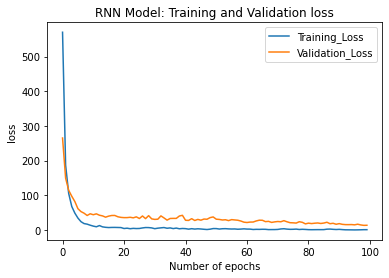

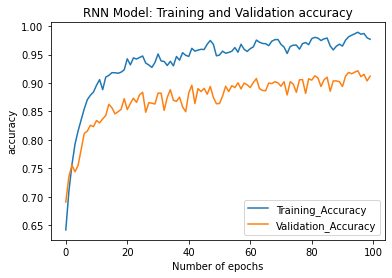

In [43]:
metrics = pd.DataFrame(history.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('RNN Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])
# Plot
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [44]:
trainPredict = rnn.predict(x_train1)
testPredict= rnn.predict(x_test1)

predicted=np.concatenate((trainPredict,testPredict),axis=0)

67/67 [==============================] - 0s 1ms/step


In [45]:
trainScore = rnn.evaluate(x_train1, y_train1, verbose=0)
print("Our accuracy is %{}".format(trainScore[1]*100))

Our accuracy is %98.29439520835876


In [46]:
testScore = rnn.evaluate(x_test1, y_test1, verbose=0)
print("Our accuracy is %{}".format(testScore[1]*100))

Our accuracy is %91.21495485305786


# LSTM

Train Data size: 8560
Test Data size 2140


Vocabulary Size : 107584


Training X Shape: (8560, 50)
Testing X Shape: (2140, 50)


In [47]:
x_train.shape

(8560, 50)

In [48]:
y_train.shape

(8560,)

In [49]:
x_test.shape

(2140, 50)

In [50]:
y_test.shape

(2140,)

In [51]:
MAX_SEQUENCE_LENGTH = 50
n_lstm = 200
drop_lstm =0.2

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout, LSTM, Bidirectional, GRU

In [52]:
embeding_dim = 16
drop_value = 0.2
n_dense = 24
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=3)

#LSTM Spam detection architecture
lstm = Sequential()
lstm.add(Embedding(vocab_size, embeding_dim, input_length=MAX_SEQUENCE_LENGTH))
lstm.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
lstm.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
lstm.add(tf.keras.layers.Flatten())
lstm.add(Dense(1, activation='sigmoid'))

In [53]:
lstm.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [54]:
early_stop = EarlyStopping(monitor='val_loss', patience=5)
history = lstm.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=num_epochs, verbose=2, callbacks=[early_stop])

Epoch 1/30
268/268 - 37s - loss: 0.1661 - accuracy: 0.9339 - val_loss: 0.0418 - val_accuracy: 0.9874 - 37s/epoch - 136ms/step
Epoch 2/30
268/268 - 37s - loss: 0.0166 - accuracy: 0.9949 - val_loss: 0.0173 - val_accuracy: 0.9939 - 37s/epoch - 139ms/step
Epoch 3/30
268/268 - 39s - loss: 0.0054 - accuracy: 0.9981 - val_loss: 0.0205 - val_accuracy: 0.9949 - 39s/epoch - 147ms/step
Epoch 4/30
268/268 - 42s - loss: 0.0032 - accuracy: 0.9992 - val_loss: 0.0153 - val_accuracy: 0.9949 - 42s/epoch - 155ms/step
Epoch 5/30
268/268 - 39s - loss: 0.0014 - accuracy: 0.9994 - val_loss: 0.0170 - val_accuracy: 0.9953 - 39s/epoch - 147ms/step
Epoch 6/30
268/268 - 37s - loss: 0.0024 - accuracy: 0.9993 - val_loss: 0.0122 - val_accuracy: 0.9953 - 37s/epoch - 139ms/step
Epoch 7/30
268/268 - 39s - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.0122 - val_accuracy: 0.9958 - 39s/epoch - 147ms/step
Epoch 8/30
268/268 - 43s - loss: 4.2174e-04 - accuracy: 0.9999 - val_loss: 0.0246 - val_accuracy: 0.9972 - 43s/epoch -

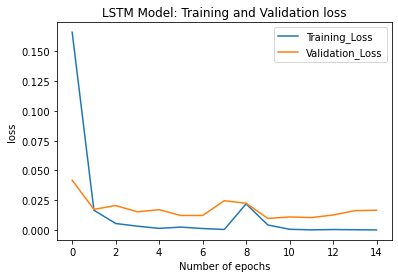

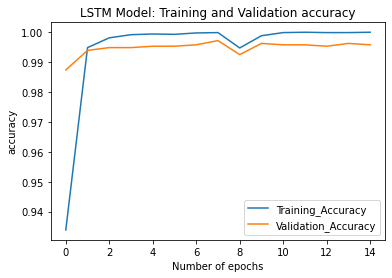

In [55]:
metrics = pd.DataFrame(history.history)

metrics.rename(columns= {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, 
               inplace = True)

def plot_graphs(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('LSTM Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

plot_graphs('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [56]:
# make predictions
trainPredict2 = lstm.predict(x_train, batch_size=256)
lstm.reset_states()
testPredict2 = lstm.predict(x_test, batch_size=256)

9/9 [==============================] - 2s 201ms/step


In [57]:
predicted2=np.concatenate((trainPredict2,testPredict2),axis=0)

In [59]:
trainScore2 = lstm.evaluate(x_test, y_test, verbose=0)
print("Our accuracy is %{}".format(trainScore2[1]*100))

Our accuracy is %99.5794415473938


# Bi-LSTM

In [60]:
bi_lstm = Sequential()
bi_lstm.add(Embedding(vocab_size, embeding_dim, input_length=MAX_SEQUENCE_LENGTH))
bi_lstm.add(Bidirectional(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True)))
bi_lstm.add(tf.keras.layers.Flatten())
bi_lstm.add(Dense(1, activation='sigmoid'))

In [61]:
bi_lstm.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [62]:
# Training
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=2)

history2 = bi_lstm.fit(x_train, y_train, epochs=num_epochs,
                    validation_data=(x_test, y_test),
                    callbacks =[early_stop], verbose=2)

Epoch 1/30
268/268 - 33s - loss: 0.1330 - accuracy: 0.9542 - val_loss: 0.0265 - val_accuracy: 0.9897 - 33s/epoch - 124ms/step
Epoch 2/30
268/268 - 34s - loss: 0.0105 - accuracy: 0.9970 - val_loss: 0.0104 - val_accuracy: 0.9972 - 34s/epoch - 126ms/step
Epoch 3/30
268/268 - 37s - loss: 0.0057 - accuracy: 0.9988 - val_loss: 0.0104 - val_accuracy: 0.9958 - 37s/epoch - 138ms/step
Epoch 4/30
268/268 - 36s - loss: 0.0170 - accuracy: 0.9973 - val_loss: 0.0098 - val_accuracy: 0.9953 - 36s/epoch - 134ms/step
Epoch 5/30
268/268 - 31s - loss: 0.0016 - accuracy: 0.9994 - val_loss: 0.0130 - val_accuracy: 0.9977 - 31s/epoch - 117ms/step
Epoch 6/30
268/268 - 34s - loss: 8.9752e-04 - accuracy: 0.9998 - val_loss: 0.0095 - val_accuracy: 0.9967 - 34s/epoch - 128ms/step
Epoch 7/30
268/268 - 30s - loss: 0.0029 - accuracy: 0.9993 - val_loss: 0.0213 - val_accuracy: 0.9958 - 30s/epoch - 113ms/step
Epoch 8/30
268/268 - 34s - loss: 0.0011 - accuracy: 0.9995 - val_loss: 0.0117 - val_accuracy: 0.9958 - 34s/epoch -

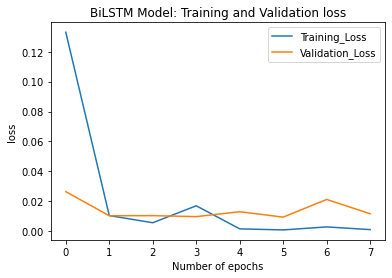

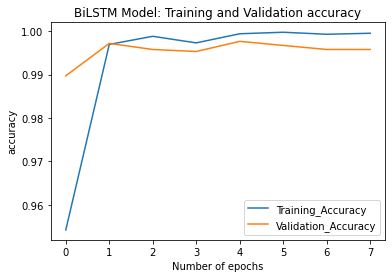

In [63]:
metrics = pd.DataFrame(history2.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('BiLSTM Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])
# Plot
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [64]:
# make predictions
trainPredict3 = bi_lstm.predict(x_train, batch_size=256)
bi_lstm.reset_states()
testPredict3 = bi_lstm.predict(x_test, batch_size=256)

9/9 [==============================] - 1s 150ms/step


In [65]:
predicted3=np.concatenate((trainPredict3,testPredict3),axis=0)

In [67]:
trainScore3 = bi_lstm.evaluate(x_test, y_test, verbose=0)
print("Our accuracy is %{}".format(trainScore3[1]*100))

Our accuracy is %99.5794415473938
